In [4]:
import numpy as np
import matplotlib.pyplot as plt
import emitEMwave as ant
import emitEMwave_update as antu

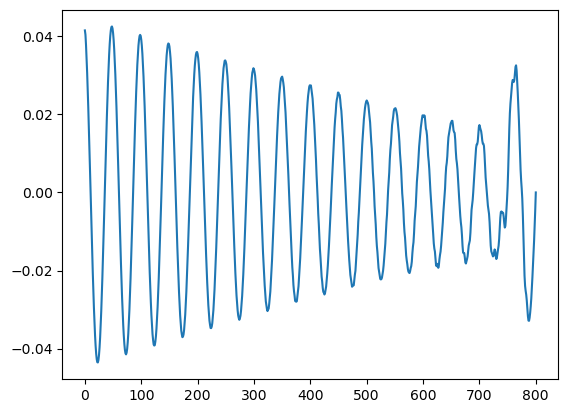

In [32]:
plt.plot(Ey[int(cntr/dy),:])
plt.show()

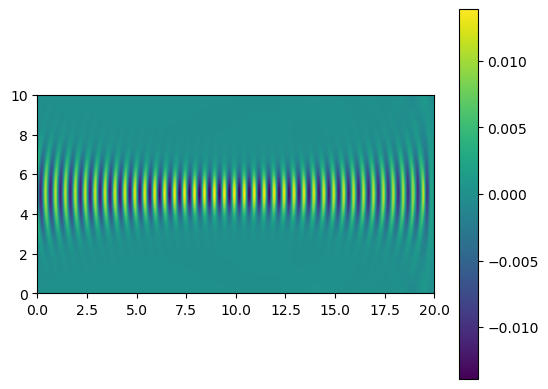

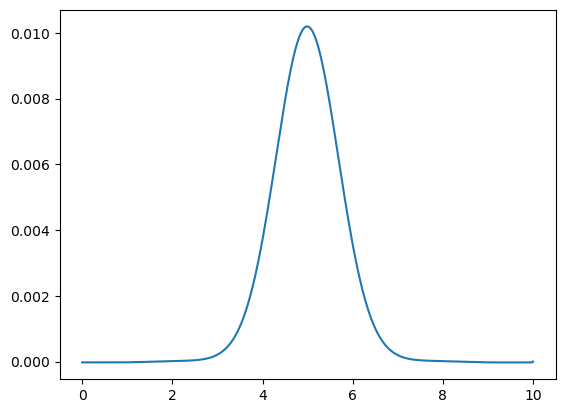

In [5]:
# input parameters
xmax=20
ymax=10
dx=0.02
dy=0.02
dt=0.01
f=2
D=10
smax=2000


a=dt/dx;  b=dt/dy
w=2.0*np.pi*f

cntr=0.5*ymax
upper=int(0.5*(ymax+D)/dy)
lower=int(0.5*(ymax-D)/dy)

x=np.arange(0,xmax+dx,dx)
y=np.arange(0,ymax+dy,dy)
Nh = int(xmax/dx/2)

X,Y=np.meshgrid(x,y)
Ex=0*X; Ey=0*X; Ez=0*X
Bx=0*X; By=0*X; Bz=0*X

s=0
while s<smax:
	#Ey[:,0]= np.exp(-(y-cntr)**2/(0.2*ymax)**2)*np.sin(w*s*dt) # emission 
	#Ey[lower:upper,0]= np.sin(w*s*dt) # hole 
	ant.emitEMwave(s*dt,Ey[lower:upper,0],(dx,dy),'ovwrt','p',0,0,f,0,0,10,(1.0,),1000,1)
	Bx[:-1,:-1] +=  -b*(Ez[1:,:-1]-Ez[:-1,:-1])
	By[1:-1,:-1] +=  a*(Ez[1:-1,1:]-Ez[1:-1,:-1])
	Bz[:-1,:-1]+= -a*(Ey[:-1,1:]-Ey[:-1,:-1]) + b*(Ex[1:,:-1]-Ex[:-1,:-1])
	Ex[1:-1,:Nh] +=  b*(Bz[1:-1,:Nh]-Bz[:-2,:Nh])
	Ex[1:-1,Nh:-1] +=  b*(Bz[1:-1,Nh:-1]-Bz[:-2,Nh:-1])
	Ey[:-1,1:Nh] += -a*(Bz[:-1,1:Nh]-Bz[:-1,:Nh-1])
	Ey[:-1,Nh:-1] += -a*(Bz[:-1,Nh:-1]-Bz[:-1,Nh-1:-2])
	Ez[1:-1,1:-1]+=  a*(By[1:-1,1:-1]-By[1:-1,:-2]) - b*(Bx[1:-1,1:-1]-Bx[:-2,1:-1])
#	Ez[1:-1,1:-1]+=  a*(By[1:-1,1:-1]-By[1:-1,:-2]) - b*(Bx[1:-1,1:-1]-Bx[:-2,1:-1])
	s+=1

extn = (0,xmax,0,ymax)
cs=plt.imshow(Ey,extent=extn); plt.colorbar(cs); plt.show()

# crossection view
plt.plot(y,Ey[:,500]); plt.show()


(501, 1001) 1001 250.5
2.718281828459045


C:\Users\LG\AppData\Local\Temp\ipykernel_2732\1206900937.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  if abs(Ey[j,i]/np.max(Ey[:,i]) - 1/np.e) < 1e-1:
C:\Users\LG\AppData\Local\Temp\ipykernel_2732\1206900937.py:7: RuntimeWarning: invalid value encountered in double_scalars
  if abs(Ey[j,i]/np.max(Ey[:,i]) - 1/np.e) < 1e-1:


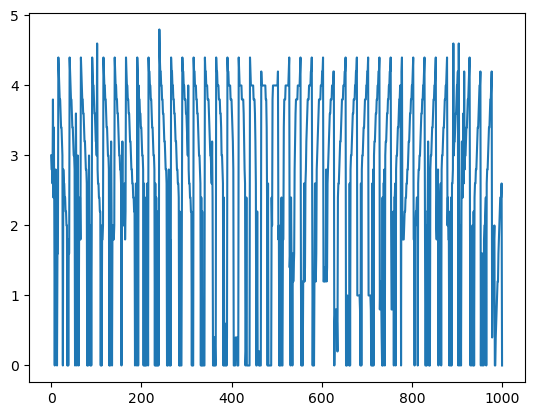

In [65]:
r = 0*x

for i in range(len(x)) :
    for j in range(0, int(len(y)/2),10) :
        if abs(Ey[j,i]/np.max(Ey[:,i]) - 1/np.e) < 1e-1:
            r[i] = j*dy
            break

plt.plot(r)
plt.show()

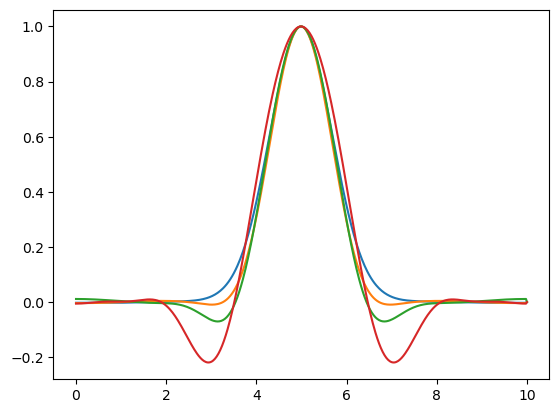

In [57]:
plt.plot(y,Ey[:,500]/np.max(Ey[:,500]))
plt.plot(y,Ey[:,600]/np.max(Ey[:,600]))
plt.plot(y,Ey[:,700]/np.max(Ey[:,700]))
plt.plot(y,Ey[:,900]/np.max(Ey[:,900]))